In [ ]:
# Import required packages

from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Information
1. **fraud_bool** (binary): If the application is fraudulent or not. (fraud_bool = 1 represents a fraudulent bank account and fraud_bool = 0 represents a legitimate bank account application).
2. **income** (numeric): Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].
3. **name_email_similarity** (numeric): Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].
4. **prev_address_months_count** (numeric): Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [–1, 380] months (–1 is a missing value).
5. **current_address_months_count** (numeric): Months in currently registered address of the applicant. Ranges between [–1, 429] months (–1 is a missing value).
6. **customer_age** (numeric): Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.
7. **days_since_request** (numeric): Number of days passed since application was done. Ranges between [0, 79] days.
8. **intended_balcon_amount** (numeric): Initial transferred amount for application. Ranges between [–16, 114] (negatives are missing values).
9. **payment_type** (categorical): Credit payment plan type. 5 possible (anonymized) values.
10. **zip_count_4w** (numeric): Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].
11. **velocity_6h** (numeric): Velocity of total applications made in last 6 hours, i.e., average number of applications per hour in the last 6 hours. Ranges between [–175, 16818].
12. **velocity_24h** (numeric): Velocity of total applications made in last 24 hours, i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].
13. **velocity_4w** (numeric): Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].
14. **bank_branch_count_8w** (numeric): Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].
15. **date_of_birth_distinct_emails_4w** (numeric): Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].
16. **employment_status** (categorical): Employment status of the applicant. 7 possible (anonymized) values.
17. **credit_risk_score** (numeric): Internal score of application risk. Ranges between [–191, 389].
18. **email_is_free** (binary): Domain of application email (either free or paid).
19. **housing_status** (categorical): Current residential status of applicant. 7 possible (anonymized) values.
20. **phone_home_valid** (binary): Validity of provided home phone.
21. **phone_mobile_valid** (binary): Validity of provided mobile phone.
22. **bank_months_count** (numeric): How old is previous account (if held) in months. Ranges between [-1, 32] months (–1 is a missing value).
23. **has_other_cards** (binary): If applicant has other cards from the same banking company.
24. **proposed_credit_limit** (numeric): Applicant’s proposed credit limit. Ranges between [200, 2000].
25. **foreign_request** (binary): If origin country of request is different from bank’s country.
26. **source** (categorical): Online source of application. Either browser (INTERNET) or app (TELEAPP).
27. **session_length_in_minutes** (numeric): Length of user session in banking website in minutes. Ranges between [–1, 107] minutes (–1 is a missing value).
28. **device_os** (categorical): Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.
29. **keep_alive_session** (binary): User option on session logout.
30. **device_distinct_emails_8w** (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [–1, 2] emails (–1 is a missing value).
31. **device_fraud_count** (numeric): Number of fraudulent applications with used device. Ranges between [0, 1].
32. **month** (numeric): Month where the application was made. Ranges between [0, 7].

# Setup

In [ ]:
# Load dataset
#df = pd.read_csv('/content/drive/MyDrive/DBA3803/Dataset/neurIPS2022_fraud_detection_base.csv')
df = pd.read_csv('neurIPS2022_fraud_detection_base.csv')

# Reveal first 5 entries of dataset
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


# Data Pre-processing (DP)

(1) Check column type and column names

In [ ]:
# Reveal shape of dataset
df.shape

(1000000, 32)

In [ ]:
# Check column names and columns data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

(2) Check duplicate records

In [ ]:
df_dup = df
duplicates = df_dup.duplicated()
duplicates.value_counts()

,count
False,1000000


This shows that there are no duplicated records.

(3) Check for missing values (negative values in this dataset)



In [ ]:
# device fraud count column

print("Distribution of device fraud count: ", df['device_fraud_count'].value_counts())

# drop, since there is no distribution, all 0s
df.drop(columns=['device_fraud_count'], inplace=True)

Distribution of device fraud count:  device_fraud_count
0    1000000
Name: count, dtype: int64


In [ ]:
# Get numerical columns
numerical_cols = df.select_dtypes(include='number').columns

In [ ]:
# Filter out 'credit_risk_score' from the check
cols_to_check = numerical_cols.difference(['credit_risk_score'])

# Handling of Missing Data (negative values)

In [ ]:
 # Find columns that have any negative values
neg_cols = [col for col in cols_to_check if (df[col] < 0).any()]
neg_cols

['bank_months_count',
 'current_address_months_count',
 'device_distinct_emails_8w',
 'intended_balcon_amount',
 'prev_address_months_count',
 'session_length_in_minutes',
 'velocity_6h']

In [ ]:
# Find number of missing data per column (negative values)
neg_counts = (df[cols_to_check] < 0).sum()
neg_counts

,0
bank_branch_count_8w,0
bank_months_count,253635
current_address_months_count,4254
customer_age,0
date_of_birth_distinct_emails_4w,0
days_since_request,0
device_distinct_emails_8w,359
email_is_free,0
foreign_request,0
fraud_bool,0


We will first look at the column *'intended_balcon_amount'* since it has the most number of missing data. Let's check if missing *'intended_balcon_amount'* has any correlation with the fraud rate.

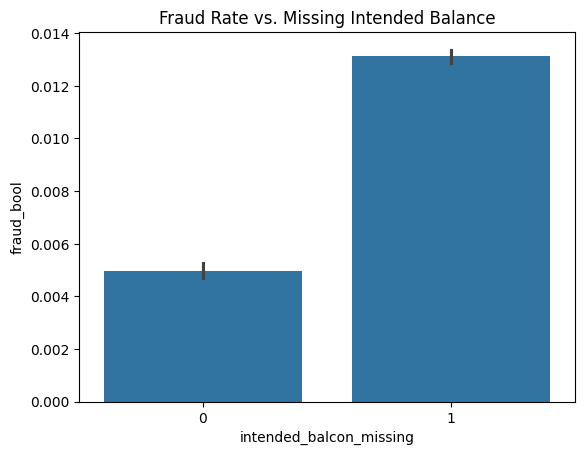

In [ ]:
# Add missing flag for intended_balcon_amount
df['intended_balcon_missing'] = (df['intended_balcon_amount'] < 0).astype(int)

# Plot fraud rate vs. missing
sns.barplot(x='intended_balcon_missing', y='fraud_bool', data=df)
plt.title("Fraud Rate vs. Missing Intended Balance")
plt.show()

Given that fraud rate is significantly higher when *'intended_balcon_amount'* is missing (**1.3%**) compared to when it is not (**0.5%**), this shows that the absence of *'intended_balcon_amount'* correlates with **higher fraud likelihood.** Hence, we should not remove the rows in *'intended_balcon_amount'* with missing values. Instead, we will replace the missing values with the median amount.

In [ ]:
# Convert missing values of intended_balcon_amount to median value instead

# Replace negative intended_balcon_amount values with NaN
df['intended_balcon_amount'] = df['intended_balcon_amount'].apply(lambda x: pd.NA if x < 0 else x)

# Calculate median of non-missing values
median_value = df['intended_balcon_amount'].median(skipna=True)

# Fill missing values with the median
df['intended_balcon_amount'].fillna(median_value, inplace=True)

# Return updated column summary
df['intended_balcon_amount'].describe()

<ipython-input-101-6d3b8156392c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['intended_balcon_amount'].fillna(median_value, inplace=True)
<ipython-input-101-6d3b8156392c>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['intended_balcon_amount'].fillna(median_value, inplace=True)


,intended_balcon_amount
count,1000000.000000
mean,33.501921
std,11.929617
min,0.000054
25%,32.433701
50%,32.433701
75%,32.433701
max,112.956928


Next, we will take a look at the column *'bank_months_count'* as it has a significant amount of missing values and bank accounts with a longer history tend not to be of fraud.

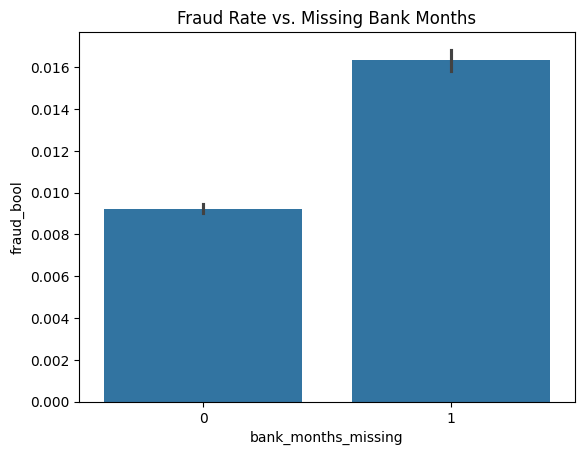

In [ ]:
# Add missing flag for bank_months_count
df['bank_months_missing'] = (df['bank_months_count'] < 0).astype(int)

# Plot fraud rate vs. missing
sns.barplot(x='bank_months_missing', y='fraud_bool', data=df)
plt.title("Fraud Rate vs. Missing Bank Months")
plt.show()

Given that fraud rate is also higher when *'bank_months_count'* is missing (**1.6%**) compared to when it is not (**0.9%**), this shows that the absence of *'bank_months_count'* also correlates with **higher fraud likelihood.** Hence, we should not remove the rows in *'bank_months_count'* with missing values.

Based on the description of the data, it seems that this is the count of the number of months the applicant had their previous bank account for. Furthermore, when we look at the initial distribution of the data, there are no rows that indicate a value of 0. As such, we can assume that the rows with missing values would indicate that the applicant does not have a previous bank account.

In [ ]:
# Number of rows of data that have a value of 0
print("Initial number of rows that indicate '0': ", (df['bank_months_count'] == 0).sum() )

# Convert missing values to 0
df['bank_months_count'] = df['bank_months_count'].apply(lambda x: 0 if x < 0 else x)

# Number of rows of data that have a value of 0
print("Updated number of rows that indicate '0': ", (df['bank_months_count'] == 0).sum() )

Initial number of rows that indicate '0':  0
Updated number of rows that indicate '0':  253635


The same logic would apply for the *prev_address_months_count* column, as people who did not have a previous address would have the data as missing.

In [ ]:
# prev_address_months_count column

# Assume those that have missing values just do not have a previous address
print("Initial number of rows that indicate '0': ", (df['prev_address_months_count'] == 0).sum() )

# Convert missing values to 0
df['prev_address_months_count'] = df['prev_address_months_count'].apply(lambda x: 0 if x < 0 else x)

# Number of rows of data that have a value of 0
print("Updated number of rows that indicate '0': ", (df['prev_address_months_count'] == 0).sum() )

Initial number of rows that indicate '0':  0
Updated number of rows that indicate '0':  712920


Next, we look at the *current address months* column. We first check to see if there are already 0s in the dataset, to see if the missing values could just be the 0s.

In [ ]:
# current_address_months_count column
# Check if there are 0s in the dataset already
print("Initial number of rows that indicate '0': ", (df['current_address_months_count'] == 0).sum() )

Initial number of rows that indicate '0':  9609


Since there are already 0s in the dataset, we change the missing values to null to not let it affect the dataset.

---



In [ ]:
# Replace negative values with NaN
df.loc[df['current_address_months_count'] < 0, 'current_address_months_count'] = np.nan

Afterwards, we moved on to look at the *missing session length*.

For the *missing session length in minutes*, there could be a chance that a missing session length could result from a malware attack on the website or other occurrences, which could be meaningful for our analysis on fraud. As such, we wanted to check the impact of missing session length in minutes on the amount of fraud.

In [ ]:
# session length in minutes
# Missingness might be meaningful, so I created a new indicator
df['session_length_missing'] = (df['session_length_in_minutes'] < 0).astype(int)


# Check the distribution of fraud among this
pd.crosstab(df['session_length_missing'], df['fraud_bool'], normalize='index') * 100

fraud_bool,0,1
session_length_missing,,
0,98.896677,1.103323
1,99.106700,0.893300


It seems that the rate of fraud is around the same whether the session length is missing or not, so the missingness of session length may not be as meaningful to our analysis. As such, we decided to convert the missing values to the median length.

In [ ]:
# Seems to be not meaningful, so column dropped and changed missing values to median length
# Drop the missing indicator
df.drop(columns=['session_length_missing'], inplace=True)

# Replace negative values with NaN
df['session_length_in_minutes'] = df['session_length_in_minutes'].apply(lambda x: pd.NA if x < 0 else x)

# Compute median (excluding missing)
median_session_length = df['session_length_in_minutes'].median(skipna=True)

# Fill missing (NaN) values with the median
df['session_length_in_minutes'] = df['session_length_in_minutes'].fillna(median_session_length)

<ipython-input-108-4e75cc36f6e2>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['session_length_in_minutes'] = df['session_length_in_minutes'].fillna(median_session_length)


In [ ]:
# Check if there are already 0s in the dataset
print("Initial number of rows that indicate '0': ", (df['device_distinct_emails_8w'] == 0).sum() )

Initial number of rows that indicate '0':  6272


This indicates that the missing rows for distinct emails do not just indicate that there are 0 email addresses, since there is already a distribution of 0s in the dataset. Now, we will check how the missing emails affect fraud count.

In [ ]:
# device distinct emails
# Missingness might be meaningful, so I created a new indicator
df['device_distinct_emails_missing'] = (df['device_distinct_emails_8w'] < 0).astype(int)


# Check the distribution of fraud among this
pd.crosstab(df['device_distinct_emails_missing'], df['fraud_bool'], normalize='index') * 100

fraud_bool,0,1
device_distinct_emails_missing,,
0,98.897104,1.102896
1,98.885794,1.114206


 Since it seems like the distribution of fraud count is around the same, it looks like the missing emails do not affect fraud count that much too. As such, we converted the missing values to null as well.

In [ ]:
# seems like not meaningful, so column dropped and changed missing values  to null
# Drop the missing indicator
df.drop(columns=['device_distinct_emails_missing'], inplace=True)

# Replace negative values with NaN
df.loc[df['device_distinct_emails_8w'] < 0, 'device_distinct_emails_8w'] = np.nan

Lastly, we will look at the relationship between *'velocity_6h'* and the fraud rate to determine if it should be removed.

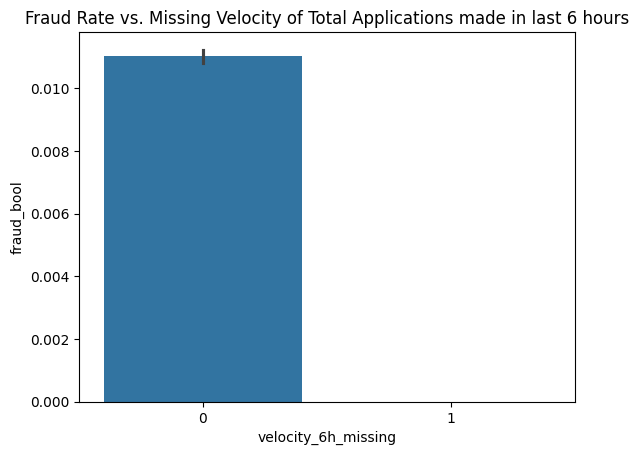

In [ ]:
# Add missing flag for velocity_6h
df['velocity_6h_missing'] = (df['velocity_6h'] < 0).astype(int)

# Plot fraud rate vs. missing
sns.barplot(x='velocity_6h_missing', y='fraud_bool', data=df)
plt.title("Fraud Rate vs. Missing Velocity of Total Applications made in last 6 hours")
plt.show()

Given that there are no frauds present when the values of *'velocity_6h'* are not missing, we will remove the rows with missing values of this column.

In [ ]:
# Remove rows with missing values from velocity_6h
df = df[df['velocity_6h'] >= 0]

Lastly, we decide to drop all the null values as they only take up less than 1% of the total dataset

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [ ]:
# Find number of missing data per column (negative values)
new_neg_counts = (df[cols_to_check] < 0).sum()
new_neg_counts

,0
bank_branch_count_8w,0
bank_months_count,0
current_address_months_count,0
customer_age,0
date_of_birth_distinct_emails_4w,0
days_since_request,0
device_distinct_emails_8w,0
email_is_free,0
foreign_request,0
fraud_bool,0


# Feature Engineering

In [ ]:
#create income to age ratio
df['income_age_ratio'] = df['income'] / df['customer_age']

#income to credit risk ratio
df['income_credit_risk_ratio'] = df['income'] / df['credit_risk_score']

#credit risk to age ratio
df['credit_risk_age_ratio'] = df['credit_risk_score'] / df['customer_age']

#income group
df['income_group']= pd.cut(df['income'], bins=[0,0.3,0.6,0.9], labels=['low', 'medium','high'])

In [ ]:
df.isnull().sum()


,0
fraud_bool,0
income,0
name_email_similarity,0
prev_address_months_count,0
current_address_months_count,0
customer_age,0
days_since_request,0
intended_balcon_amount,0
payment_type,0
zip_count_4w,0


Rationale for new variables:
1. Income-to-Age Ratio: Assesses earning potential relative to age for evaluating financial stability, helping identify if income aligns with expected career growth.

2. Income-to-Credit Risk Ratio: Measures income sufficiency against credit risk for risk assessment, ensuring income can cover potential financial risk.

3. Credit Risk-to-Age Ratio: Identifies credit risk trends across different age groups, highlighting potential financial behavior patterns with age.

4. Income Group: Segments applicants into income brackets for better risk profiling, simplifying the analysis of financial behavior based on income levels.

# Export Final Dataset

In [ ]:
df.to_csv('/content/drive/MyDrive/DBA3803/Dataset/final_dataset.csv', index=False)